In [6]:
import matplotlib.pyplot as plt

In [111]:
def linear_time_partition_model(N):
    naive = 0
    
    # h_pq terms:
    naive += N  # p = q, yields Z_p
    if naive >= 2:
        naive += N * (N - 1) / 2 * 4  # p != q, each yields 4 Pauli strings
    
    # h_pqrs terms:
    naive +=  0  # p = q = r = s terms already covered in h_pq
    naive +=  0  # N choose 2 terms already covered in h_pq as well
    if naive >= 3:  # 3 unique indices, yields 8 Pauli strings
        naive += N * (N - 1) * (N - 2) / 6 * 8
    if naive >= 4:  # p > q > r > s, each yields 16 Pauli strings
        naive += N * (N - 1) * (N - 2) * (N - 3) / 24 * 16
    
    simultaneous = 0
    simultaneous += 1  # covers all number operators and number-excitation operators via Z-basis
    if N >= 3:
        simultaneous += N * (N - 1) * (N - 2) / 6 * 2
    if N >= 4:
        simultaneous += N * (N - 1) * (N - 2) * (N - 3) / 24 * 2
    
    return simultaneous, naive

In [113]:
simultaneous_list = [linear_time_partition_model(N)[0] for N in range(2, 8)]
naive_list = [linear_time_partition_model(N)[1] for N in range(2, 8)]
simultaneous_factor = [naive / simultaneous for simultaneous, naive in zip(simultaneous_list, naive_list)]

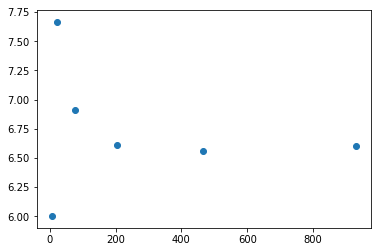

In [114]:
plt.scatter(naive_list, simultaneous_factor)

In [115]:
naive_list

[6.0, 23.0, 76.0, 205.0, 466.0, 931.0]

In [116]:
print(simultaneous_factor)

[6.0, 7.666666666666667, 6.909090909090909, 6.612903225806452, 6.563380281690141, 6.602836879432624]
